#  Two Histo Fit 2 D
Example to fit two histograms at the same time.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:33 AM.</small></i>

In [1]:
%%cpp -d
#include "TH2D.h"
#include "TF2.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TRandom3.h"
#include "TVirtualFitter.h"
#include "TList.h"

#include <vector>
#include <map>
#include <iostream>

Data need to be globals to be visible by fcn

In [2]:
std::vector<std::pair<double, double> > coords;
std::vector<double > values;
std::vector<double > errors;


TRandom3 rndm;

 A helper function is created: 

In [3]:
%%cpp -d
double gauss2D(double *x, double *par) {
   double z1 = double((x[0]-par[1])/par[2]);
   double z2 = double((x[1]-par[3])/par[4]);
   return par[0]*exp(-0.5*(z1*z1+z2*z2));
}

 A helper function is created: 

In [4]:
%%cpp -d
double my2Dfunc(double *x, double *par) {
   double *p1 = &par[0];
   double *p2 = &par[5];
   return gauss2D(x,p1) + gauss2D(x,p2);
}

 A helper function is created: 

In [5]:
%%cpp -d
void myFcn(Int_t & /*nPar*/, Double_t * /*grad*/ , Double_t &fval, Double_t *p, Int_t /*iflag */  )
{
  int n = coords.size();
  double chi2 = 0;
  double tmp,x[2];
  for (int i = 0; i <n; ++i ) {
    x[0] = coords[i].first;
    x[1] = coords[i].second;
    tmp = ( values[i] - my2Dfunc(x,p))/errors[i];
    chi2 += tmp*tmp;
  }
  fval = chi2;
}

 A helper function is created: 

In [6]:
%%cpp -d
void FillHisto(TH2D * h, int n, double * p) {


  const double mx1 = p[1];
  const double my1 = p[3];
  const double sx1 = p[2];
  const double sy1 = p[4];
  const double mx2 = p[6];
  const double my2 = p[8];
  const double sx2 = p[7];
  const double sy2 = p[9];
  //const double w1 = p[0]*sx1*sy1/(p[5]*sx2*sy2);
  const double w1 = 0.5;

  double x, y;
  for (int i = 0; i < n; ++i) {
    // generate randoms with larger gaussians
    rndm.Rannor(x,y);

    double r = rndm.Rndm(1);
    if (r < w1) {
      x = x*sx1 + mx1;
      y = y*sy1 + my1;
    }
    else {
      x = x*sx2 + mx2;
      y = y*sy2 + my2;
    }
    h->Fill(x,y);

  }
}

 Arguments are defined. 

In [7]:
bool global = true;

In [8]:
  // create two histograms

  int nbx1 = 50;
  int nby1 = 50;
  int nbx2 = 50;
  int nby2 = 50;
  double xlow1 = 0.;
  double ylow1 = 0.;
  double xup1 = 10.;
  double yup1 = 10.;
  double xlow2 = 5.;
  double ylow2 = 5.;
  double xup2 = 20.;
  double yup2 = 20.;

  TH2D * h1 = new TH2D("h1","core",nbx1,xlow1,xup1,nby1,ylow1,yup1);
  TH2D * h2 = new TH2D("h2","tails",nbx2,xlow2,xup2,nby2,ylow2,yup2);

  double iniParams[10] = { 100, 6., 2., 7., 3, 100, 12., 3., 11., 2. };
  // create fit function
  TF2 * func = new TF2("func",my2Dfunc,xlow2,xup2,ylow2,yup2, 10);
  func->SetParameters(iniParams);

  // fill Histos
  int n1 = 50000;
  int n2 = 50000;
  //  h1->FillRandom("func", n1);
  //h2->FillRandom("func",n2);
  FillHisto(h1,n1,iniParams);
  FillHisto(h2,n2,iniParams);

  // scale histograms to same heights (for fitting)
  double dx1 = (xup1-xlow1)/double(nbx1);
  double dy1 = (yup1-ylow1)/double(nby1);
  double dx2 = (xup2-xlow2)/double(nbx2);
  double dy2 = (yup2-ylow2)/double(nby2);

H1->sumw2();
   h1->Scale( 1.0 / ( n1 * dx1 * dy1 ) );

In [9]:
  // scale histo 2 to scale of 1
  h2->Sumw2();
  h2->Scale(  ( double(n1) * dx1 * dy1 )  / ( double(n2) * dx2 * dy2 ) );


  if (global) {
 // fill data structure for fit (coordinates + values + errors)
 std::cout << "Do global fit" << std::endl;
 // fit now all the function together

 // fill data structure for fit (coordinates + values + errors)
 TAxis *xaxis1  = h1->GetXaxis();
 TAxis *yaxis1  = h1->GetYaxis();
 TAxis *xaxis2  = h2->GetXaxis();
 TAxis *yaxis2  = h2->GetYaxis();

 int nbinX1 = h1->GetNbinsX();
 int nbinY1 = h1->GetNbinsY();
 int nbinX2 = h2->GetNbinsX();
 int nbinY2 = h2->GetNbinsY();

  /// reset data structure
  coords = std::vector<std::pair<double,double> >();
  values = std::vector<double>();
  errors = std::vector<double>();


  for (int ix = 1; ix <= nbinX1; ++ix) {
 for (int iy = 1; iy <= nbinY1; ++iy) {
   if ( h1->GetBinContent(ix,iy) > 0 ) {
      coords.push_back( std::make_pair(xaxis1->GetBinCenter(ix), yaxis1->GetBinCenter(iy) ) );
      values.push_back( h1->GetBinContent(ix,iy) );
      errors.push_back( h1->GetBinError(ix,iy) );
   }
 }
  }
  for (int ix = 1; ix <= nbinX2; ++ix) {
 for (int iy = 1; iy <= nbinY2; ++iy) {
   if ( h2->GetBinContent(ix,iy) > 0 ) {
      coords.push_back( std::make_pair(xaxis2->GetBinCenter(ix), yaxis2->GetBinCenter(iy) ) );
      values.push_back( h2->GetBinContent(ix,iy) );
      errors.push_back( h2->GetBinError(ix,iy) );
   }
 }
  }

  TVirtualFitter::SetDefaultFitter("Minuit");
  TVirtualFitter * minuit = TVirtualFitter::Fitter(0,10);
  for (int i = 0; i < 10; ++i) {
 minuit->SetParameter(i, func->GetParName(i), func->GetParameter(i), 0.01, 0,0);
  }
  minuit->SetFCN(myFcn);

  double arglist[100];
  arglist[0] = 0;
  // set print level
  minuit->ExecuteCommand("SET PRINT",arglist,2);

 // minimize
  arglist[0] = 5000; // number of function calls
  arglist[1] = 0.01; // tolerance
  minuit->ExecuteCommand("MIGRAD",arglist,2);

  //get result
  double minParams[10];
  double parErrors[10];
  for (int i = 0; i < 10; ++i) {
 minParams[i] = minuit->GetParameter(i);
 parErrors[i] = minuit->GetParError(i);
  }
  double chi2, edm, errdef;
  int nvpar, nparx;
  minuit->GetStats(chi2,edm,errdef,nvpar,nparx);

  func->SetParameters(minParams);
  func->SetParErrors(parErrors);
  func->SetChisquare(chi2);
  int ndf = coords.size()-nvpar;
  func->SetNDF(ndf);

  std::cout << "Chi2 Fit = " << chi2 << " ndf = " << ndf << "  " << func->GetNDF() << std::endl;

  // add to list of functions
  h1->GetListOfFunctions()->Add(func);
  h2->GetListOfFunctions()->Add(func);
  }
  else {
 // fit independently
 h1->Fit(func);
 h2->Fit(func);
  }



  // Create a new canvas.
  TCanvas * c1 = new TCanvas("c1","Two HIstogram Fit example",100,10,900,800);
  c1->Divide(2,2);
  gStyle->SetOptFit();
  gStyle->SetStatY(0.6);

  c1->cd(1);
  h1->Draw();
  func->SetRange(xlow1,ylow1,xup1,yup1);
  func->DrawCopy("cont1 same");
  c1->cd(2);
  h1->Draw("lego");
  func->DrawCopy("surf1 same");
  c1->cd(3);
  func->SetRange(xlow2,ylow2,xup2,yup2);
  h2->Draw();
  func->DrawCopy("cont1 same");
  c1->cd(4);
  h2->Draw("lego");
  gPad->SetLogz();
  func->Draw("surf1 same");

  return 0;

Do global fit
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 p0           1.00000e+02  1.00000e-02     no limits
     2 p1           6.00000e+00  1.00000e-02     no limits
     3 p2           2.00000e+00  1.00000e-02     no limits
     4 p3           7.00000e+00  1.00000e-02     no limits
     5 p4           3.00000e+00  1.00000e-02     no limits
     6 p5           1.00000e+02  1.00000e-02     no limits
     7 p6           1.20000e+01  1.00000e-02     no limits
     8 p7           3.00000e+00  1.00000e-02     no limits
     9 p8           1.10000e+01  1.00000e-02     no limits
    10 p9           2.00000e+00  1.00000e-02     no limits
 **********
 **    1 **SET PRINT           0  2.668e-322
 **********
 **********
 **    2 **MIGRAD        5000        0.01
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 FCN=4015.63 FROM MIGRAD    STATUS=CONVERGED     525 CALLS         526 TOTAL
                     EDM=7.64858e-07    STRATEGY= 1  ERROR MATRIX UN

Draw all canvases 

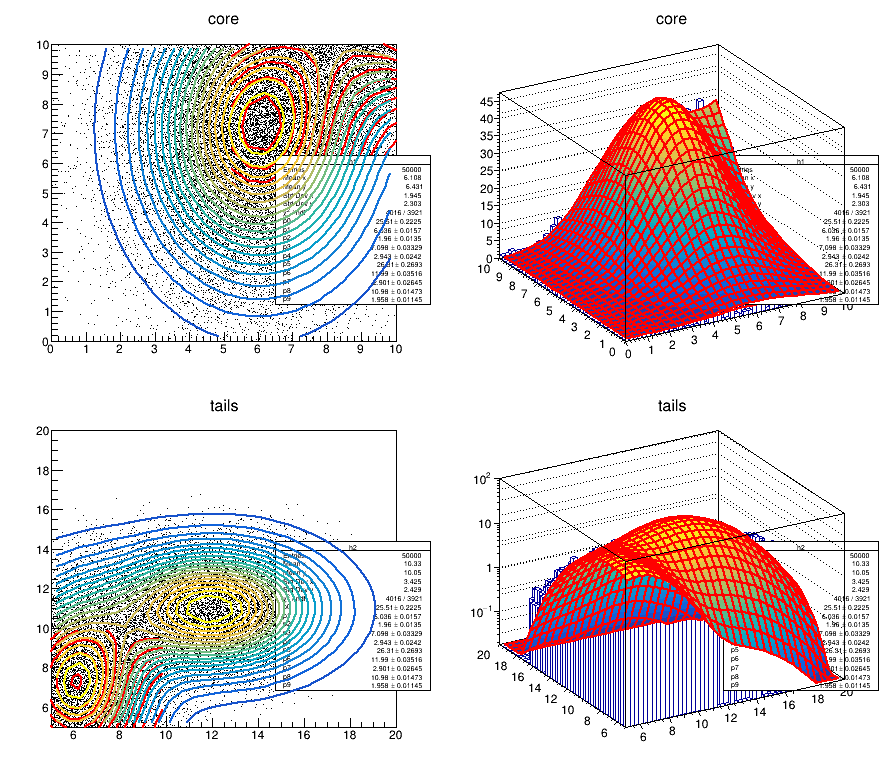

In [10]:
gROOT->GetListOfCanvases()->Draw()